### Motion Controls
##### Goal  
Modular Code So blocks for specific functions or buttons
First Identify What functions are necessary for experiment context

#### Features from LabView Code 

Accepts these Inputs:  
IP Address: 192.168.254.254  
Port No: 5001  
Timeout: 10,000  
GroupName: Group 1  
nbitems: 1  
TargetPosition:  
STOP BUTTON  

### Connect and Status

1. Create xps object and Checks group status below

In [ ]:
%load_ext autoreload
%autoreload 2   

# from newportxps.newportxps import NewportXPS

# xps = NewportXPS('192.168.254.254', username='Administrator', password='Administrator')

# print(xps.status_report())


In [ ]:
# xps.read_systemini()

Error Description:
ZM high level: This refers to the mechanical zero signal used with some stages. The ZM
signal is high during one part of the travel and low during the other part of the travel.
The detection of the ZM high/low transition in combination with an encoder index pulse
signal allows a fast and repeatable origin search
(MechanicalZeroAndIndexHomeSearch).

Do I need to resolve this error? Don't think so has not prevented the running of following commands



In [ ]:
# Print all stages configured on the controller
#for sname, info in xps.stages.items():
#    print(sname, xps.get_stage_position(sname), info)

Note:  To prevent following Error during Homing process. Ensure that within the stages.ini configuration file the Home Search Process Parameters are as below the maximum velocity is 40 Unit/Sec.  
SETTINGS:  
; --- Home search process parameters  
; --- <HomeSearch.MechanicalZeroAndIndexHomeSearch>  
HomeSearchSequenceType = MechanicalZeroAndIndexHomeSearch  
HomeSearchMaximumVelocity = 30 ; Unit/Sec  
HomeSearchMaximumAcceleration = 400 ; Unit/Sec²  
HomeSearchTimeOut = 10 ; Sec  
HomingSensorOffset = 0 ; Unit  

### Initialize and Home

2. Now Initialize Group  
Notes:  
Initializing the group (turning the motor on) causes the stage to move.  
Have not neccessarily observed pattern in how much the stage moves or even the direction it moves.  
Comparing the command above and below to check the position of the group shows the change.
AFter initializing group Status is in Not Referenced State


In [ ]:
#if group status enabled then kill all groups else initialize group
# Remember to Kill Group before exiting or if the motor is still on
#xps.kill_group('Group1')

# Turns on the servo Motor for the specified group and home the stage
#xps.initialize_group('Group1', with_encoder=True, home=True, with_raise=True)

In [ ]:
# Print all groups configured on the controller
#for gname, info in xps.groups.items():
#    print(gname, info)

In [ ]:
# Note Turning the servo on will cause the stage to move the stage position
# Check to make sure that these functions perform as expected
#print('Where Group1.Pos is', xps.get_stage_position('Group1.Pos'), info)
# print(xps.get_group_status())

### Move Motion Stage

In [ ]:
# Move the stage to a new position. Default is absolute motion can optionally set the motion to relative by relative=True
# xps.move_stage('Group1.Pos', 10.0)


## start here
#### TESTING FUNCTIONS FROM SIMPLIFIED CONTROLLER SCRIPT

In [ ]:
import newportxps.controller_param as cp

In [ ]:
# Initialize motion controller with host IP address and optional group name
controller = cp.MotionController('192.168.254.254', username='Administrator', password='Administrator')


The initialize and Home function Initializes and homes all the groups connected to the controller.

In [ ]:

# Initialize and home the motion controller
controller.initialize_and_home()


The set_position function currently needs the name of the Stage to be specified but I can hard code this to be the first stage name  this to be the first stage name.

In [ ]:

# Set position of a stage
controller.set_position(stage="Group1.Pos", position=50.0)


In [ ]:
controller.get_position(stage="Group1.Pos")

In [ ]:

# Set velocity parameters for a stage
# Can be expanded to include acceleration and jerktime parameters
controller.set_velocity(stage="Group1.Pos", velocity=500.0, )


In [ ]:
controller.get_velocity(stage="Group1.Pos") 

In [ ]:
controller.set_position(stage="Group1.Pos", position=0.0)

In [ ]:

# Stop the motion controller
controller.stop_controller()

## Attenuator Controls

In [ ]:
import newportxps.attenuator as ac


In [ ]:
# las = ac.AttenuatorControls(port='COM3')
# las.setup()
# las.rotate_to(45)  # Move to 45 degrees
# # las.set_speed(4)  # Set speed to 4 degrees per second
# las.block_laser()  # Block the laser
# las.clear_laser()  # Clear the laser
# las.home_attenuator()  # Move to home position


## Troubleshooting attempt ##
1. Take Pictures of current state of controller wiring
2. Examine Attenuator Schematics understand them in relation to the physical system

Today: First tried to run commands above again and got the same response of the cell continuously running. Then tried uploading the Arduino sketch to the controller through the Arduino IDE unsuccessfully. See Screeshot below,
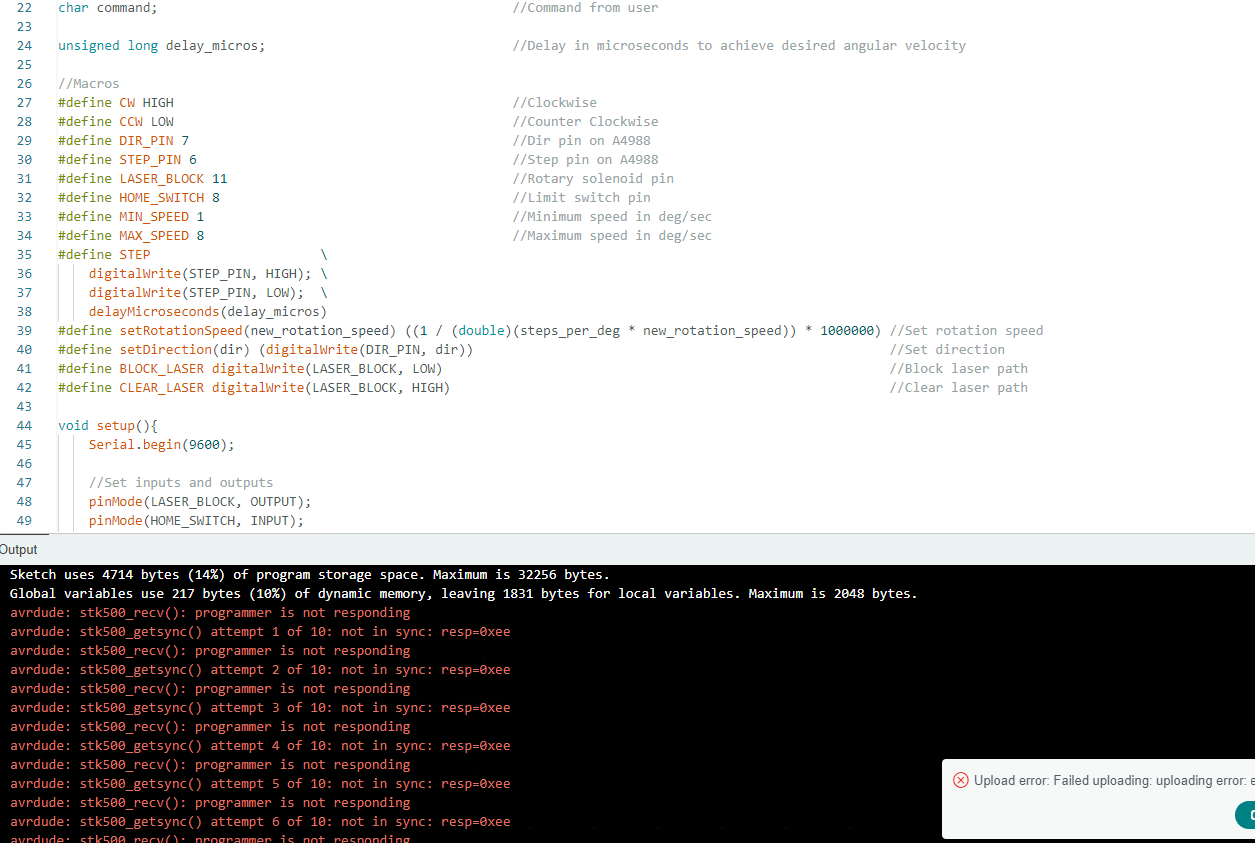
Will proceed with initial plan to resolve the unresponsiveness of the controller.

In [ ]:
laser = ac.AttenuatorControls()

    
angle = 45
speed = 4

# Execute the sequence of operations
laser.rotate_to_angle(angle)
laser.clear_laser()
laser.block_laser()
laser.home_attenuator()
laser.set_rotation_speed(speed)

# Close the serial connection
laser.close()
